# Data Preparation for Data Science
Mariam Baradeiya 

### Importing the necessary packages and modules:
 - numpy: data container  
 - pandas: data manipulation  
 - matplotlib: data visualization  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading and Intial Exploration

### 1.1 Loading the dataset
    using pandas data frame to save the csv file

In [5]:
df = pd.read_csv('googleplaystore.csv')

### 1.2 Displaying the first and last 6 raws
    using the head() method to display the first 6 raws 

In [7]:
df.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


    using the tail() method to display the last 6 raws

In [9]:
df.tail(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### 1.3 The shape of the dataset
    using the shape attribute from the numpy 
    note that we deleted a raw that contained a missing cell that affected all the other cells

In [11]:
df.drop([10472], inplace = True)
print(df.shape)

(10840, 13)


from the result we can see that there are 10840 raws and 13 columns in the dataset 


### 1.4 Discribtive statistics for numerical columns
    using the discribe() method 
    But first we need to do some changes and data cleaning including:
    1. remove the + and , in the installs column 
    2. convert it to int data type and not object
    3. convert the reveiws coloumn data type to int
    (note that I used variables and changed on them using the "to_numeric" method and not on the dataframe itself, because those things are required below)
    

In [14]:

rating_col = df['Rating']
rating_col = pd.to_numeric(rating_col, downcast ='float')
print(rating_col.describe() )
print('\n')

reviews_col = df['Reviews']
reviews_col = pd.to_numeric(reviews_col, downcast ='integer')
print(reviews_col.describe())
print('\n')

installs_col = df['Installs'].str.replace(',', '')\
                            .str.replace('+', '')
installs_col = pd.to_numeric(installs_col, downcast ='integer')
print(installs_col.describe())

count    9366.000000
mean        4.191757
std         0.515217
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64


count    1.084000e+04
mean     1.546434e+07
std      8.502936e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


from the above we can know: 
 - count: the number of elements in each column which is the number of raws in the dataset if there are no null or nan values.
 - mean: which is the average of the values of each coloumn, indicates central tendency, that almost data are concentrated around this value, for instance 4.191757 in rating, mening the average rating were kind of high.
 - std: the standard diveation of the mean which tells us how data are distributed arount the mean, higher std gives more variablity, for example, 2.927761e+06 for the reviews indicates that people vary more or less than the mean by 2.927761e+06. 
 - min: the minimun value (which is zero for reviews and installs but 1 for rating), and maximum value for each column 
 - the first(25%), second(median, 50%), third(75%), quartiles of each column
   how data are distributed within each quarter of the column



## 2. Data Cleaning

### 2.1 Data types of columns and null ability

In [17]:
print(df.dtypes)
print('\n')
print(df.isnull().any())

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool


 only rating is of type float while the others are of type object

 Rating, type, current ver, and android ver columns have null values

### 2.2 Drop raws where type is missing
using the drop method for the dataframe

In [20]:
df = df[(df['Type'] == "Free" )| (df['Type'] == "Paid")]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


    we notice that one row is missing which means that there was one row where the type wasn't paid nor free and it was droped because I chose to keep only paid or free in the type column

### 2.3 Filling missing values in the Rating column with the median of the same app category


In [23]:
med = df.groupby('Category')['Rating'].median()
df['Rating'] = df.apply(lambda row: med[row['Category']] if pd.isnull(row['Rating']) else row['Rating'] ,axis = 1)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


    I used a variable to keep the Rating medians of each category
    
    then I used the apply method with lambda expression to change the rating to the median of the same category if the rating is null and to keep the rating if it not null.
    
    we used median because it is a better indecator for the central tendency, not being severly affected by the outliers.

### 2.4 Convert the Installs column to a numeric type 
    with removing "+" and ","

In [26]:
df["Installs"] = df["Installs"].str.replace(',', '')\
                                .str.replace('+', '')
df['Installs'] = df['Installs'].astype(int)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


    I used the replace method to remove the , and then the + from the installs values
    I then changed the column's data type using the astype(int) method 

### 2.5  Convert the Price column to a numeric type
    with the same way, change the price column to float after removing the $

In [29]:
df['Price'] = df['Price'].str.replace("$", "", regex = False)
df['Price'] = df['Price'].astype(float)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 3. Data Filtering

### 3.1 Create a new DataFrame containing only free apps
    where (Type = Free)

In [32]:
df2 = df[df['Type'] == 'Free']
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


    notice that the number of columns is 10039 which is less than the original dataframe, so filtering worked

### 3.2 Filter apps with a rating greater than 4.5 and more than 1 million installs


In [35]:
df = df[(df['Rating'] > 4.5) & (df['Installs'] > 1000000)]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24M,10000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986,35M,5000000,Free,0.0,Everyone,Auto & Vehicles,"August 2, 2018",1.9.7,4.0.3 and up
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,432160,15M,10000000,Free,0.0,Everyone,Health & Fitness,"June 28, 2018",Varies with device,Varies with device
10033,ETERNITY WARRIORS 2,GAME,4.6,568391,5.2M,5000000,Free,0.0,Teen,Action,"July 1, 2014",4.3.1,2.1 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25M,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10213,Who Viewed My Facebook Profile - Stalkers Visi...,SOCIAL,4.6,273244,9.9M,5000000,Free,0.0,Everyone,Social,"June 24, 2018",4.1.1,4.0.3 and up


### 3.3 List the top 3 most installed apps in the "Education" category

In [37]:
df[df['Category'] == 'EDUCATION'].sort_values(by = 'Installs', ascending = False).head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
826,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
799,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device


    education is uppercase, we sorted the values in descending order and then showed the head 3 rows

## 4. Grouping and Aggregation

### 4.1  Group the data by Category and calculate the average rating for each category

In [41]:
catRating = df.groupby('Category')['Rating'].mean()
catRating

Category
ART_AND_DESIGN         4.666667
AUTO_AND_VEHICLES      4.800000
BOOKS_AND_REFERENCE    4.663636
BUSINESS               4.650000
COMMUNICATION          4.600000
EDUCATION              4.652174
ENTERTAINMENT          4.600000
FAMILY                 4.647826
FINANCE                4.636364
FOOD_AND_DRINK         4.675000
GAME                   4.641667
HEALTH_AND_FITNESS     4.672727
HOUSE_AND_HOME         4.600000
LIFESTYLE              4.622222
MAPS_AND_NAVIGATION    4.633333
MEDICAL                4.700000
NEWS_AND_MAGAZINES     4.660000
PARENTING              4.700000
PERSONALIZATION        4.623810
PHOTOGRAPHY            4.622727
PRODUCTIVITY           4.623077
SHOPPING               4.620000
SOCIAL                 4.635714
SPORTS                 4.635714
TOOLS                  4.633333
TRAVEL_AND_LOCAL       4.675000
VIDEO_PLAYERS          4.681818
Name: Rating, dtype: float64

### 4.2 Which category has the lowest and highest average rating?
    a. min

In [43]:
catRating[catRating == catRating.min()]

Category
COMMUNICATION     4.6
ENTERTAINMENT     4.6
HOUSE_AND_HOME    4.6
Name: Rating, dtype: float64

     using the min method to git the lowest rating (4.6) and filtering the catRating series
     notice that there are 3 categories with the lowest rating, those are: COMMUNICATION, ENTERTAINMENT, HOUSE_AND_HOME

     b. max

In [45]:
catRating[catRating == catRating.max()]

Category
AUTO_AND_VEHICLES    4.8
Name: Rating, dtype: float64

    following the same method as min
    there is only one category with the max rating of 4.8 which is AUTO_AND_VEHICLES

### 4.3  Group the data by Content Rating (e.g., Everyone, Teen) and calculate each group's median and sum number of installs.


In [48]:
df.groupby('Content Rating')['Installs'].agg(['median','sum'])

,median,sum
Content Rating,,
Everyone,10000000.0,11420000000
Everyone 10+,10000000.0,1345000000
Mature 17+,10000000.0,675000000
Teen,10000000.0,3195000000


## 5.  New Column Creation

### Create a new column, Revenue Estimate for paid apps, by multiplying Price (convert to numeric) by Installs.

In [51]:
df['Revenue Estimated'] = df['Price'] * df['Installs']
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_16992\1835298196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue Estimated'] = df['Price'] * df['Installs']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue Estimated
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,0.0
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24M,10000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up,0.0
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986,35M,5000000,Free,0.0,Everyone,Auto & Vehicles,"August 2, 2018",1.9.7,4.0.3 and up,0.0
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,432160,15M,10000000,Free,0.0,Everyone,Health & Fitness,"June 28, 2018",Varies with device,Varies with device,0.0
10033,ETERNITY WARRIORS 2,GAME,4.6,568391,5.2M,5000000,Free,0.0,Teen,Action,"July 1, 2014",4.3.1,2.1 and up,0.0
10190,Fallout Shelter,FAMILY,4.6,2721923,25M,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up,0.0
10213,Who Viewed My Facebook Profile - Stalkers Visi...,SOCIAL,4.6,273244,9.9M,5000000,Free,0.0,Everyone,Social,"June 24, 2018",4.1.1,4.0.3 and up,0.0


## 6. Visualization

### 6.1 Histogram of app ratings

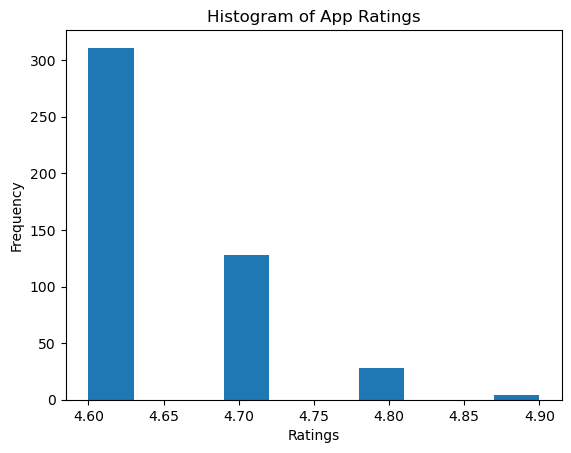

In [54]:
plt.hist('Rating', data = df)
plt.title("Histogram of App Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

    notice that 4.6 rating is the most common rating while 4.8 is the lowest 
    we notice that there is a negative relationship between the rating the number of apps who get the rating 

### 6.2 Create a bar plot showing the top 10 most common app categories.

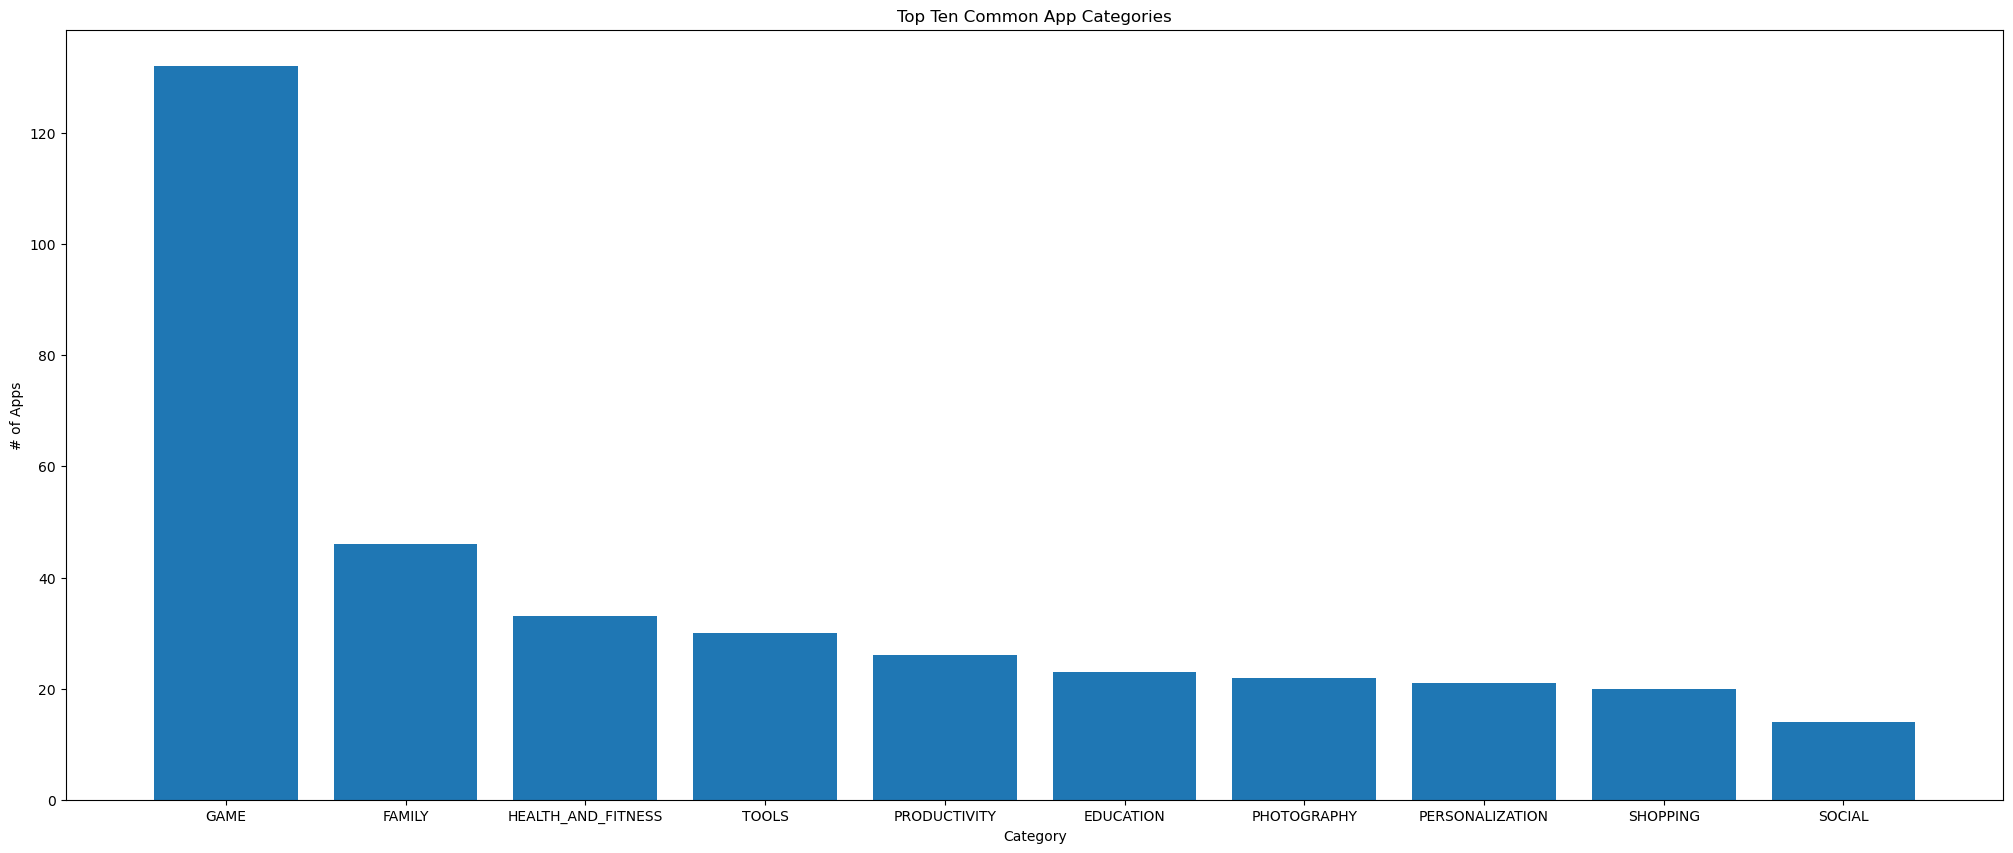

In [57]:
topTen = df['Category'].value_counts().head(10).reset_index()
topTen.columns = ['Category', 'Count']
plt.figure(figsize = (25,10))
plt.bar(height = 'Count', x= 'Category' , data = topTen)
plt.title('Top Ten Common App Categories')
plt.xlabel('Category')
plt.ylabel('# of Apps')
plt.show()

    We notice that Game is the most common and social is the 10th common application based on number of apps in each category